# A template to run your scripts and automatically submit them to kaggle.
You should copy this notebook (File -> Save a copy in Drive), download the copy (File -> Download -> Download .ipynb), and commit it to your git repository. That way you can modify it to suit your needs.


# Clone GitHub repository
We clone your GitHub repository each time this cell is run. Your repository should contain the dataset you downloaded from the Kaggle competition at a location your train and test scripts can find it.

You'll need to authenticate yourself with GitHub for this to work.

Start by getting a GitHub access token: go to https://github.com/settings/tokens and click "Generate new token". There are two different types of GitHub tokens. Make a classic token and select the repo scope. You'll have to enable two-factor authentication for this to work. It'll look like this:

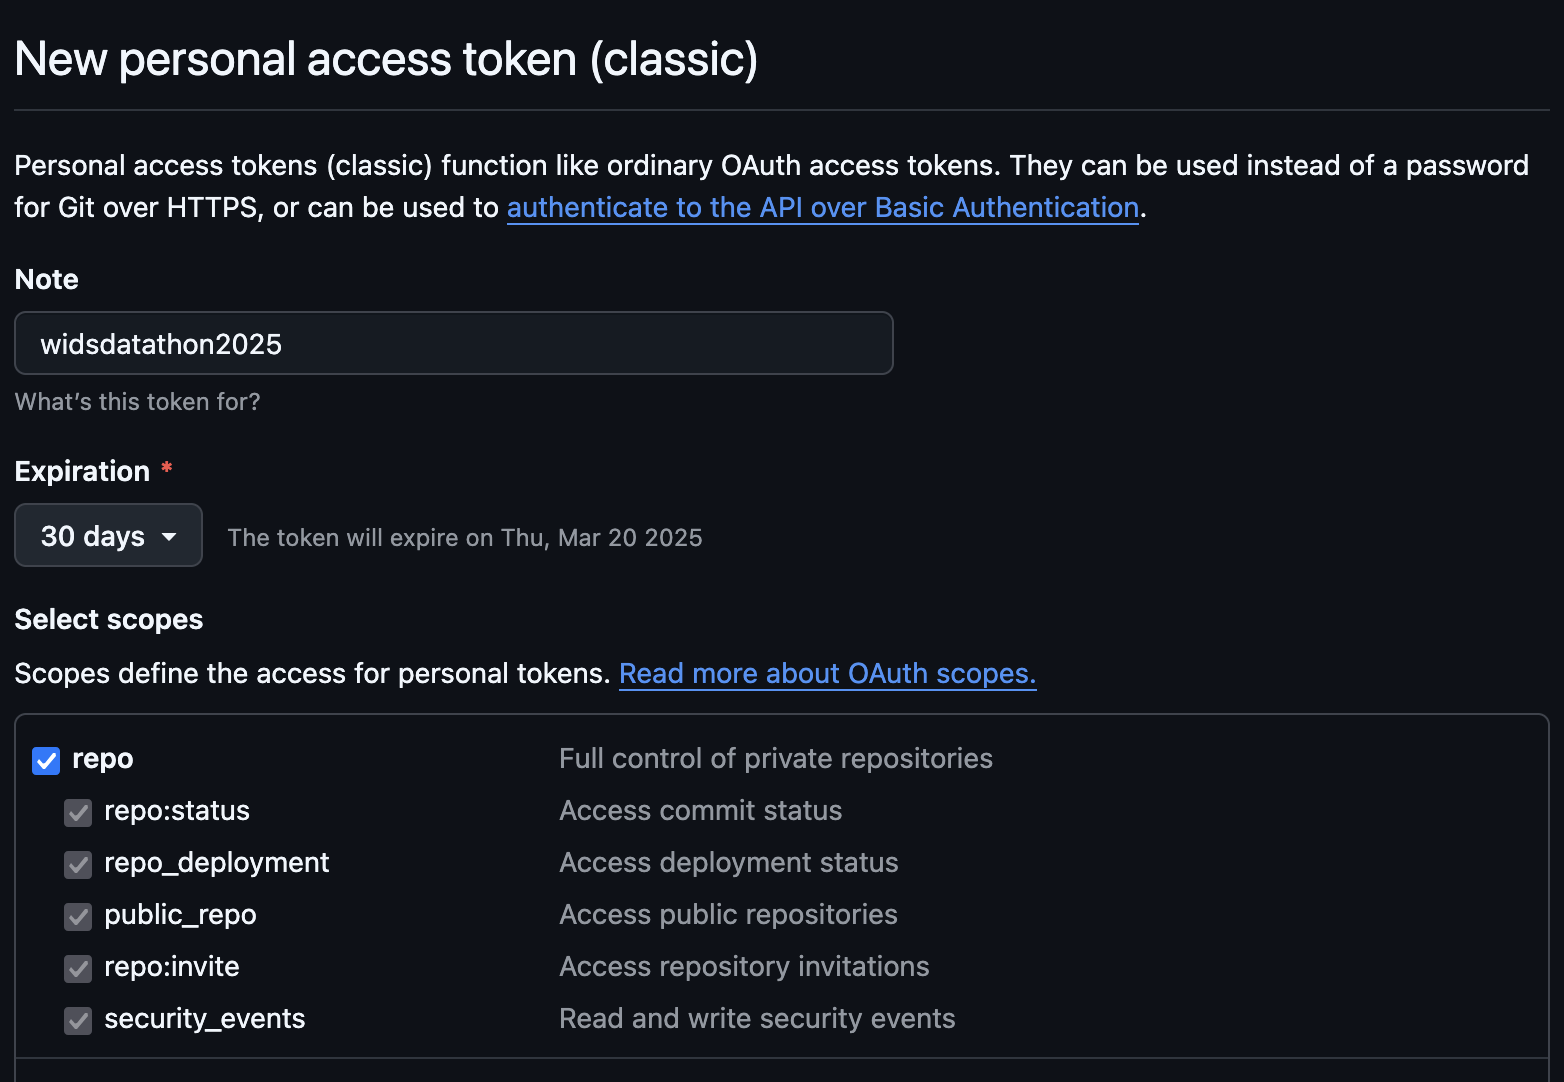

Copy the token you get into the colab secrets pane (the key on the left bar of your screen) under the name "githubAccessToken".

In [7]:
from google.colab import userdata
token = userdata.get('githubAccessToken')
%cd /content
!rm -rf widsdatathon2025
!git clone https://{token}@github.com/pmfirestone/widsdatathon2025.git
%cd /content/widsdatathon2025/

/content
Cloning into 'widsdatathon2025'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 32 (delta 11), reused 29 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 209.27 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/widsdatathon2025


# Export Kaggle username and secrets.
We also need to authenticate with Kaggle to enable automatic submission of results.

You can get a token from Kaggle by going to https://www.kaggle.com/settings, scrolling down to API, and clicking "Create New Token." Then you should add the token to the secrets tab on the left of the screen (the key) under the name "kaggleKey".

In [ ]:
key = userdata.get('kaggleKey')
username = userdata.get('kaggleUsername')
! export KAGGLE_USERNAME={username}
! export KAGGLE_KEY={key}

# Install requirements.
The `requirements.txt` file should contain all the requirements for your scripts (e.g. pandas, kaggle, scikit-learn, torch, etc.). An example such file is at https://github.com/pmfirestone/widsdatathon2025/blob/main/requirements.txt.

In [ ]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


# Run the training script.
You should have the dataset from the competition in your repository somewhere. The training script should save your model somewhere you can find it in the future.

In [ ]:
! python train.py

Traceback (most recent call last):
  File "/content/widsdatathon2025/quantitative.py", line 12, in <module>
    categorical_df = pd.read_excel("TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx", index_col=0)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/common.py", line 882, in get_handle
    handle = open(handle, ioargs.mode)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'TRAIN/TRAIN_CATEGORICAL_METADATA

# Run evaluation
Generate properly-formatted output. This is split into a separate script purely for convention; you could easily have the entire pipeline in a single script.

In [ ]:
! python test.py

# Submit to Kaggle.
This assumes your submission is in a file called `sumbission.csv`.

In [ ]:
! kaggle competitions submit widsdatathon2025 --file submission.csv --message "Submission"

# Push to GitHub
We can also push our submissions to GitHub as a way to keep track of them.

You'll have to give yourself an email and name to make commits.

In [ ]:
# UPDATE ME WITH YOUR INFO.
! git config --global user.email "you@example.com"
! git config --global user.name "Your Name"

In [8]:
from datetime import datetime
! git add submission.csv
! git commit --message "Automated submission at {datetime.now()}."
! git push

fatal: pathspec 'submission.csv' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

